In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as Integ
import scipy.interpolate as Inter
from scipy import linalg as spLA
from numpy import linalg as LA

In [3]:
def omega(X, x):
    a = 1.0
    for i in range(len(X)):
        a *= (x - X[i])
    return a  

In [4]:
#Файл написан для облегчения написания потоковой кр по вычматам

Оценка погрешности интерполяции n - степень многочлена

$$\|f - P_n(x) \| <= \frac{max(f^{n+1})}{(n+1)!} \|\omega_{n+1} (x)\| $$

In [5]:
#№2
#Нахождение интерполяционного многочлена с промежуточными выкладками
#Этим же алгоритмом можно найти корень нелинейного уравнения методом обратной интерполяции

X = np.array([-2, -1, 0, 1, 2, 3], dtype = float)
Y = np.array([-1, 0, 2, 3, 2, 1], dtype = float)

Raz = np.zeros((len(X), len(X)), dtype = float)
Lagr = Inter.lagrange(X, Y)
print('В лоб\n', Lagr)
# by hands
for i in range(len(X)):
    Raz[0][i] = Y[i]
for j in range(len(X)-1):
    for i in range(len(X) - 1 - j):
        Raz[j+1][i] = (Raz[j][i+1] - Raz[j][i])/(X[j + 1 + i] - X[i])
print('Таблица разделенных разностей: \n')
print(Raz.transpose())
print('\n Значение интерполяционного многочлена в точке:', Lagr(-1.5))
print('\nМногочлен omega\n', omega(X, -1.5))
der = 7
print('\nПогрешность\n', omega(X, -1.5)*der/math.factorial(len(X)))

В лоб
          5           4          3          2
0.01667 x + 0.04167 x - 0.3333 x - 0.5417 x + 1.817 x + 2
Таблица разделенных разностей: 

[[-1.          1.          0.5        -0.33333333  0.04166667  0.01666667]
 [ 0.          2.         -0.5        -0.16666667  0.125       0.        ]
 [ 2.          1.         -1.          0.33333333  0.          0.        ]
 [ 3.         -1.          0.          0.          0.          0.        ]
 [ 2.         -1.          0.          0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.        ]]

 Значение интерполяционного многочлена в точке: -0.7343750000000004

Многочлен omega
 -14.765625

Погрешность
 -0.1435546875


In [6]:
# №3
#Достаточное условие сходимости - норма матрицы Якоби в некоторой окрестности корня строго меньше 1


Формула экстраполяции Ричардсона
$$I \approx I_h + \frac{I_h - I_{2h}}{2^p -1}$$
p - порядок сходимости, для метода трапеций по умолчанию он равен 2

Формула порядка сходимости с помощью процесса Эйткена
$$2^p = \frac{I_{2h} - I_{4h}}{I_{h} - I_{2h}}$$
Уточнение с помощью процесса Эйткена - замена p = 2 на реальный порядок сходимости

In [7]:
#№5 Численное интегрирование
#   Замечание: Значение, полученное экстраполяцией Ричардсона для метода трапеций должно совпасть со значением,
#   полученным методои Симпсона
h = 0.25
X = np.arange(0, 2.25 , 0.25)
Y = np.array([0, 0.489540, 0.647175, 0.697211, 0.642093, 0.464366, 0.130279, -0.419361, -1.294451]) 
I_h = 0.501019
I_2h = 0.386161
I_4h = -0.0051325
print('Трапеция, h\t', Integ.trapz(Y, X))
print('Трапеция, 2h\t', Integ.trapz(Y[::2], X[::2]))
print('Трапеция, 4h\t', Integ.trapz(Y[::4], X[::4]))
print('Симпсон, h\t', Integ.simps(Y, X))
print('Ричардсон, h\t', I_h + (I_h - I_2h)/3)
print('Порядок аппроксимации', math.log((I_2h - I_4h)/(I_h - I_2h),2) )
print('Уточнение процессом Эйткена', I_4h + ((I_2h - I_4h)**2)/(2*I_2h - I_h - I_4h))

Трапеция, h	 0.501019375
Трапеция, 2h	 0.3861607499999999
Трапеция, 4h	 -0.005132499999999984
Симпсон, h	 0.5393055833333332
Ричардсон, h	 0.539305
Порядок аппроксимации 1.7683997993184286
Уточнение процессом Эйткена 0.5487421041743915


In [8]:
Y = np.array([-1.1, -0.9, -0.7, -0.5], dtype = float)
X = np.array([-0.2108, -0.0653, 0.0534, 0.1321], dtype = float)

Raz = np.zeros((len(X), len(X)), dtype = float)
Lagr = Inter.lagrange(X, Y)
print('В лоб\n', Lagr)
# by hands
for i in range(len(X)):
    Raz[0][i] = Y[i]
for j in range(len(X)-1):
    for i in range(len(X) - 1 - j):
        Raz[j+1][i] = (Raz[j][i+1] - Raz[j][i])/(X[j + 1 + i] - X[i])
print('Таблица разделенных разностей: \n')
print(Raz.transpose())
print('\n Значение интерполяционного многочлена в точке:', Lagr(0))


В лоб
        3         2
9.226 x + 3.229 x + 1.69 x - 0.8009
Таблица разделенных разностей: 

[[-1.1         1.37457045  1.17467646  9.22601818]
 [-0.9         1.68491997  4.33827809  0.        ]
 [-0.7         2.54129606  0.          0.        ]
 [-0.5         0.          0.          0.        ]]

 Значение интерполяционного многочлена в точке: -0.8008525586225932


In [9]:
#Матрица:
A = np.array([[0, 1], [0, 0]], dtype = float)
print('Фробениуса:',LA.norm(A))
print('Обычная', LA.norm(A, 2))

Фробениуса: 1.0
Обычная 1.0


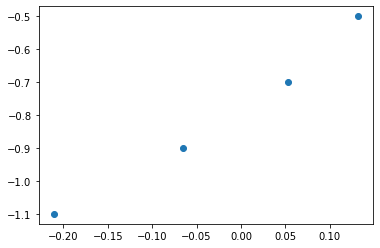

In [10]:
#Графики
fig = plt.figure()
plt.plot(X, Y, 'o')
plt.show()

In [11]:
#Вспомогательный многочлен Лагранжа
def l(k, x, X):
    Value = 1
    for i in range(len(X)):
        if (i != k):
            Value *= (x - X[i])/(X[k] - X[i])
        else:
            continue
    return Value

In [12]:
#Для функции Лебега
X = np.array([0, math.pi/6, math.pi/4, math.pi/3])
print(l(3, math.pi/5, X))
sum = 0
for i in range(len(X)):
    sum += math.fabs(l(i, math.pi/5, X))
print(sum)

-0.07200000000000008
1.1760000000000002
